In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

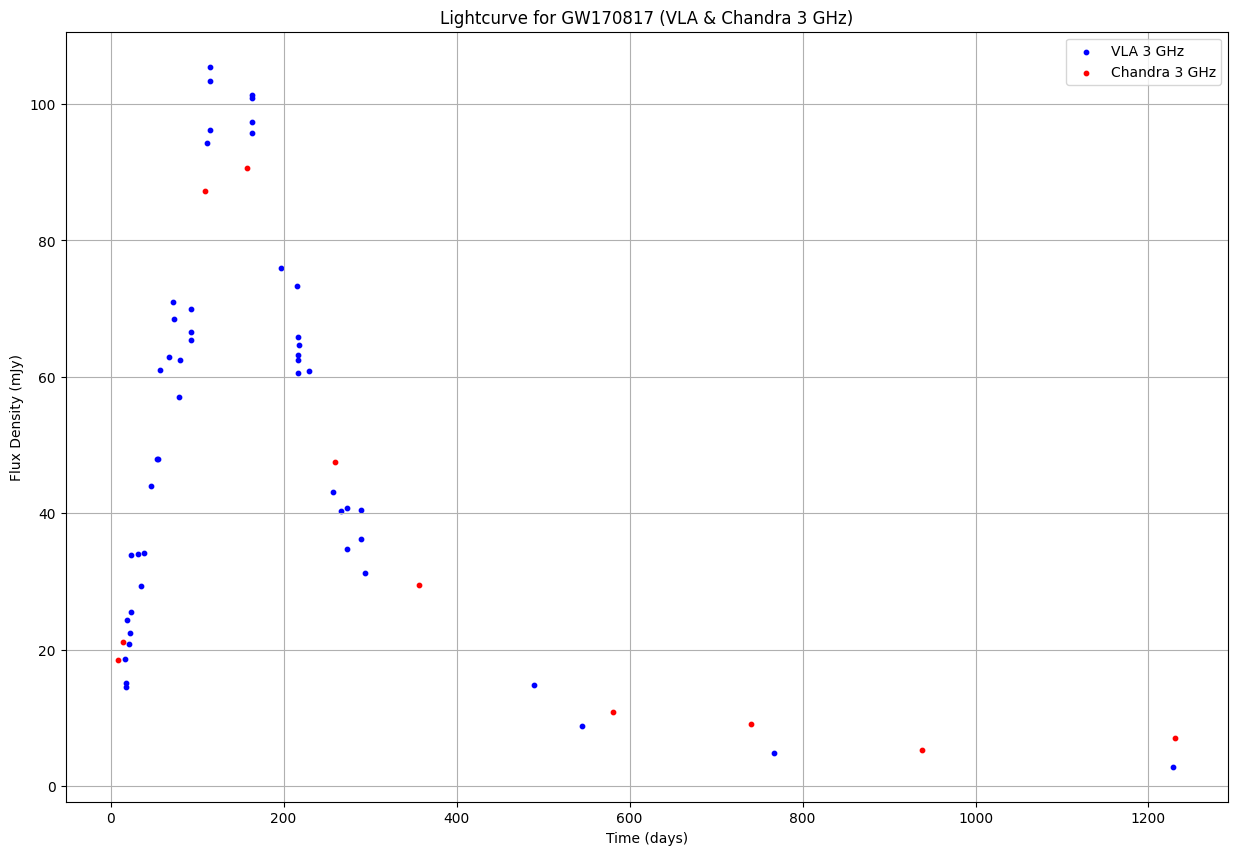

In [2]:
file_path = 'Data/gw170817_afterglow_data_full.txt'
data = ascii.read(file_path)

data = data.to_pandas()

vla_data = data[data['Telescope'] == 'VLA']
vla_data = vla_data[vla_data['FluxD'].str.contains('<') == False]

vla_data['FluxD'] = pd.to_numeric(vla_data['FluxD'])
vla_data['FluxDErr'] = pd.to_numeric(vla_data['FluxDErr'])
vla_data['Freq'] = pd.to_numeric(vla_data['Freq'])

vla_data['FluxD'] = vla_data['FluxD'] * (vla_data['Freq'] / 3.000000e+09)**0.584
vla_data['Freq'] = 3.000000e+09

# Filter Chandra data
chandra_data = data[data['Telescope'] == 'Chandra']
chandra_data = chandra_data[chandra_data['FluxD'].str.contains('<') == False]

chandra_data['FluxD'] = pd.to_numeric(chandra_data['FluxD'])
chandra_data['FluxDErr'] = pd.to_numeric(chandra_data['FluxDErr'])
chandra_data['Freq'] = pd.to_numeric(chandra_data['Freq'])

chandra_data['FluxD'] = chandra_data['FluxD'] * (chandra_data['Freq'] / 3.000000e+09)**0.584
chandra_data['Freq'] = 3.000000e+09

# Plotting
plt.figure(figsize=(15, 10))
plt.scatter(vla_data['T'], vla_data['FluxD'], color='b', s=10, label='VLA 3 GHz')
plt.scatter(chandra_data['T'], chandra_data['FluxD'], color='r', s=10, label='Chandra 3 GHz')

plt.xlabel('Time (days)')
plt.ylabel('Flux Density (mJy)')
plt.title('Lightcurve for GW170817 (VLA & Chandra 3 GHz)')
plt.legend()
plt.grid(True)

plt.show()